# Morphological Operations on a Fingerprint Image

In this notebook, we demonstrate the application of morphological operations to enhance a fingerprint image. The process involves converting the image to grayscale, inverting it, binarizing it using Otsu's method, and then applying specific morphological operations to remove small objects and close small holes. These steps are crucial for preprocessing images in applications such as fingerprint analysis where clarity and detail are essential.

## Importing Necessary Libraries

We begin by importing the required libraries from `skimage` for image processing, and `matplotlib.pyplot` for image visualization.

In [10]:
# !pip3 install scikit-image
# !pip3 install matplotlib

In [11]:
from skimage import io, util, morphology, filters
from skimage.color import rgb2gray
from skimage.morphology import disk
import matplotlib.pyplot as plt

## Loading and Preprocessing the Image

The image is loaded and then converted to grayscale if it is not already. This step is essential for the subsequent binarization and morphological operations.

In [12]:
# Load the image
img_path = './imgs/fingerprint.jpeg'  # Make sure to put the correct path here
image = io.imread(img_path)

# Convert image to grayscale if it is in color
if len(image.shape) == 3:
    image = rgb2gray(image)

## Binarization Using Otsu's Method

We invert the image to prepare it for binarization. Otsu's method is then applied to obtain a binary image, which differentiates the foreground (fingerprint) from the background.

In [13]:
# Invert the image
inverted_image = util.invert(image)

# Binarize the image using Otsu's method
thresh = filters.threshold_otsu(inverted_image)
binary_image = inverted_image > thresh

## Morphological Operations

### Removing Small Objects

This operation aims to remove noise and small artifacts that are not part of the fingerprint. Objects smaller than a specified size are removed from the binary image.

In [14]:
# Remove small objects
cleaned_image = morphology.remove_small_objects(binary_image, min_size=64)

### Closing Small Holes

Closing is applied to the cleaned image to fill in small holes and ensure continuity in the fingerprint ridges. This step uses a disk-shaped structural element for the morphological closing operation.

In [15]:
# Close small holes
restored_image = morphology.closing(cleaned_image, disk(3))

## Visualizing the Results

Finally, we visualize the original, binarized, and restored images side by side for comparison.

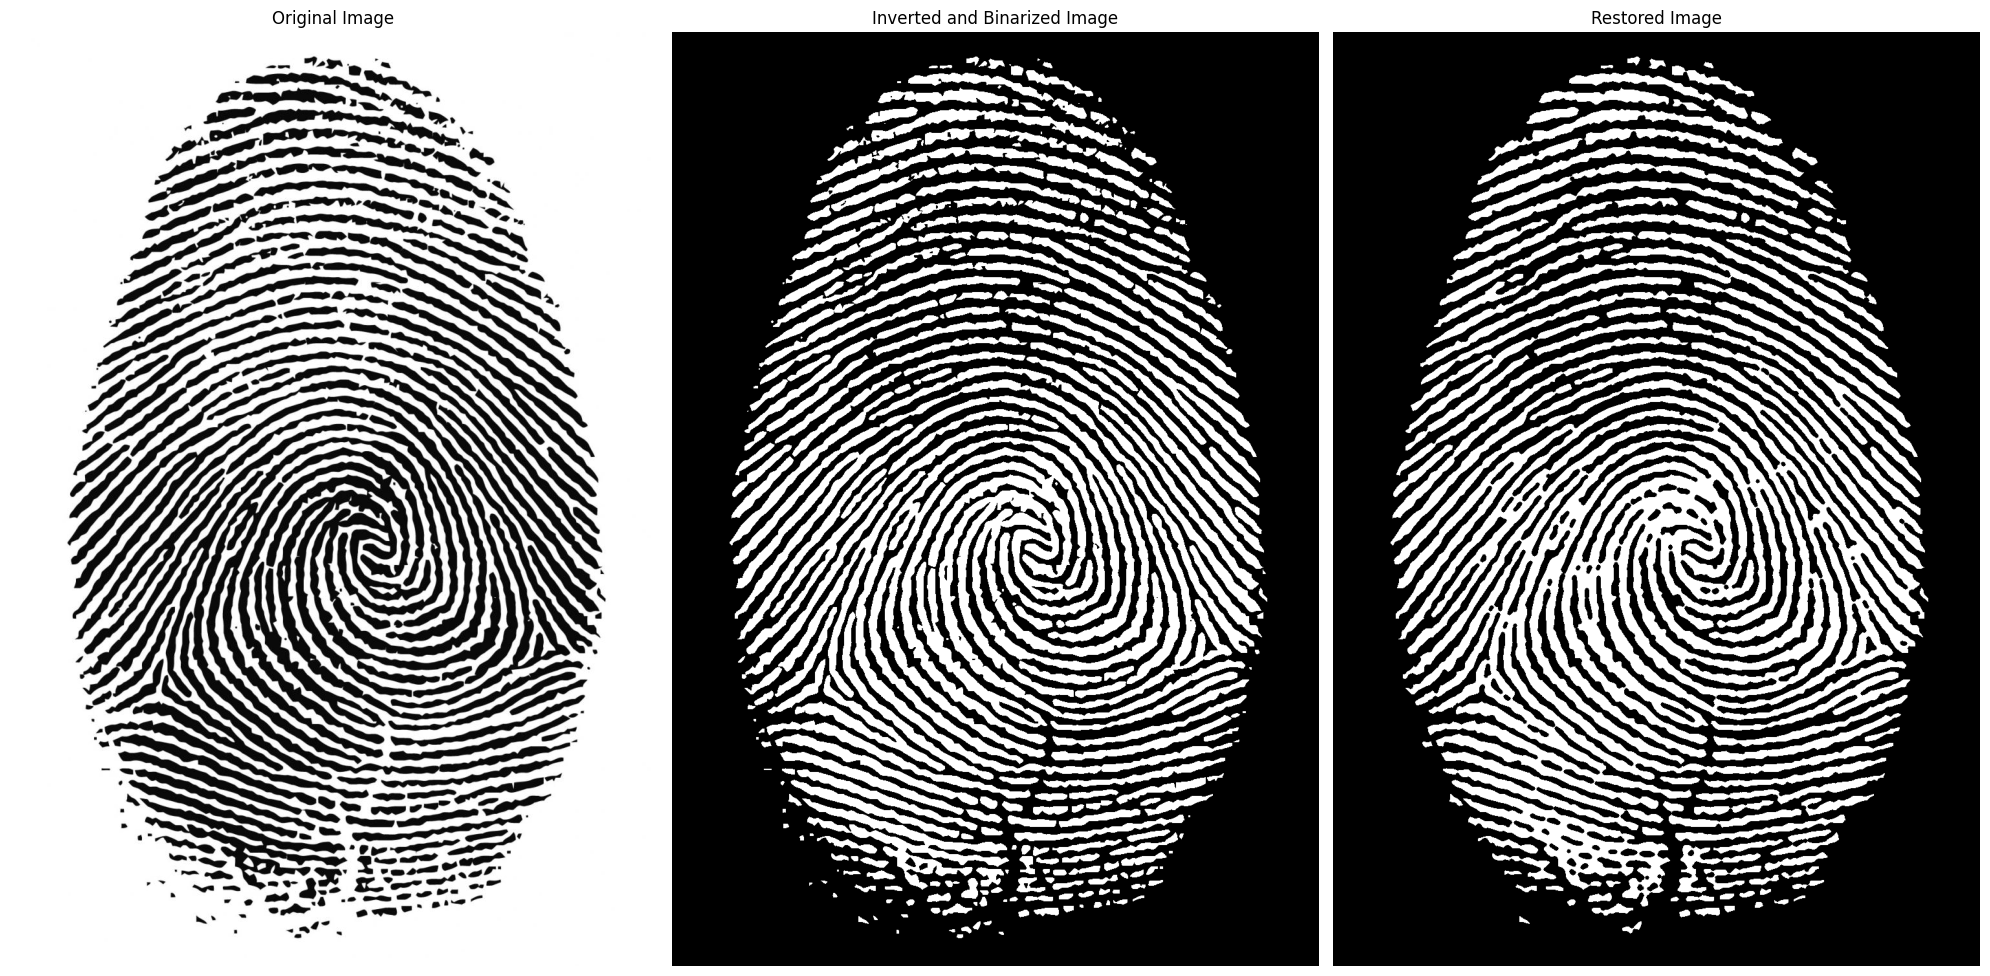

In [16]:
# Plotting the images
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Inverted and Binarized Image')
axes[1].axis('off')

axes[2].imshow(restored_image, cmap='gray')
axes[2].set_title('Restored Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()